# Project Name: Trip Pricing with Taxi Mobility Analytics

The main aim of this project is to predict the SurgePricingType based on various features

### Lifecycle in a Data Science Project

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [3]:
# Reading the train dataset
df_train = pd.read_csv("sigma_cabs.csv")

In [4]:
# Reading the train dataset
df_test = pd.read_csv("test.csv")

In [9]:
# Get the number of rows and columns of the dataset
print('Train Dataset contain {} rows and {} columns'.format(df_train.shape[0],df_train.shape[1]))

Train Dataset contain 131662 rows and 14 columns


In [8]:
# Get the number of rows and columns of the dataset
print('Test Dataset contain {} rows and {} columns'.format(df_test.shape[0],df_test.shape[1]))

Test Dataset contain 87395 rows and 13 columns


### Features
1. Trip_ID: ID for TRIP
2. Trip_Distance: The distance for the trip requested by the customer
3. TypeofCab: Category of the cab requested by the customer
4. CustomerSinceMonths: Customer using cab services since n months; 0 month means current month
5. LifeStyleIndex: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above
7. Destination_Type: Sigma Cabs divides any destination in one of the 14 categories.
8. Customer_Rating: Average of life time ratings of the customer till date
9. CancellationLast1Month: Number of trips cancelled by the customer in last 1 month
10. Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes
11. Gender: Gender of the customer
12. SurgePricingType: Target (can be of 3 types)

In [10]:
# displaying the top 5 rows in our train dataset
df_train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [11]:
# displaying the top 5 rows in our test dataset
df_test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [13]:
# Get the information of columns in train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [14]:
# Get the information of columns in test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  74237 non-null  object 
 3   Customer_Since_Months        83429 non-null  float64
 4   Life_Style_Index             74068 non-null  float64
 5   Confidence_Life_Style_Index  74068 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var1                         40606 non-null  float64
 10  Var2                         87395 non-null  int64  
 11  Var3                         87395 non-null  int64  
 12  Gender                       87395 non-null  object 
dtypes: float64(5), i

Inference
- Here we can see the some columns have missing values.
- Here Customer_Since_Months datatype will change into Int as the month will not be in float.

## Data Analysis

### Treating the missing values

##### Handling Missing values
     1. Continuous
      - Between 00% to 10% ----> impute with mean or median.
      - Between 10% to 60% ----> impute with bfill or ffill or predictive approach.
      - Between 60% to 90% ----> Create Dummy
      - Between 90% to 100% ---> Drop
     2. Categorical
      - Between 00% to 10% ----> impute with Mode
      - Between 10% to 60% ----> Create New Category "NA"
      - Between 60% to 90% ----> Create New Category "NA" or Drop 
      - Between 90% to 100% ---> Drop
      
      * Not very critical for advanced algorithms 

In [15]:
## Combining the Dataset
df_test["Surge_Pricing_Type"] = np.nan
df_train["data"] = "train"
df_test["data"] = "test"
df_test = df_test[df_train.columns]
df_all = pd.concat([df_train,df_test],axis=0)

In [16]:
## Displaying the top 5 rows in combined dataset
df_all.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,data
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2.0,train
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2.0,train
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2.0,train
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3.0,train
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2.0,train


In [17]:
# Get the Null Values
df_all.isnull().sum()

Trip_ID                             0
Trip_Distance                       0
Type_of_Cab                     33368
Customer_Since_Months            9886
Life_Style_Index                33520
Confidence_Life_Style_Index     33520
Destination_Type                    0
Customer_Rating                     0
Cancellation_Last_1Month            0
Var1                           117819
Var2                                0
Var3                                0
Gender                              0
Surge_Pricing_Type              87395
data                                0
dtype: int64

In [19]:
# Get the Null Values percentage
df_all.isnull().sum()/df_all.shape[0]*100

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.232565
Customer_Since_Months           4.512981
Life_Style_Index               15.301953
Confidence_Life_Style_Index    15.301953
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.784631
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type             39.896009
data                            0.000000
dtype: float64

In [20]:
## Type_of_Cab
## Filling with New Variable
df_all["Type_of_Cab"].fillna("F",inplace=True)

In [21]:
## Confidence_Life_Style_Index
## Filling with New Variable
df_all["Confidence_Life_Style_Index"].fillna("D",inplace=True)

In [22]:
## Customer_Since_Months
## Filling with Mode
df_all["Customer_Since_Months"].fillna(df_all["Customer_Since_Months"].mode()[0],inplace=True)
df_all["Customer_Since_Months"] = df_all["Customer_Since_Months"].astype(int)

In [23]:
## Life_Style_Index
## Filling with Mean(train dataset)
cols = ["Life_Style_Index"]
for col in cols:
    if (col not in ['Surge_Pricing_Type','data']) & (df_all[col].isnull().sum()>0):
        df_all.loc[df_all[col].isnull(),col]=df_all.loc[df_all['data']=='train',col].mean()

In [24]:
## Var1
## Dropping the Variable 1
df_all = df_all.drop("Var1",axis=1)

In [25]:
df_all.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index                   0
Confidence_Life_Style_Index        0
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type             87395
data                               0
dtype: int64

### Univariate Analysis

##### Categorical Features

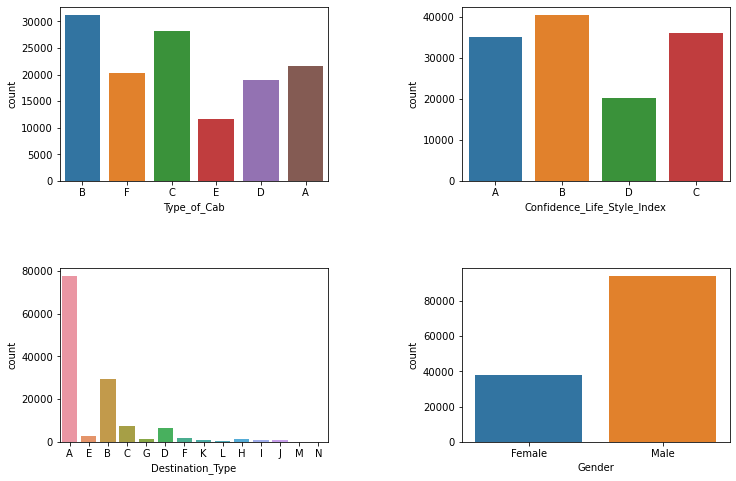

In [28]:
cat_cols = ['Type_of_Cab', 'Confidence_Life_Style_Index','Destination_Type', 'Gender']
fig,axes = plt.subplots(2,2,figsize=(12,8))
for idx,cat_col in enumerate(cat_cols):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df_train,ax=axes[row,col])
plt.subplots_adjust(wspace=0.5,hspace=0.5)

##### Inference
1. Type_of_Cab
   - Cab type "B" is most used or requested by passengers (customers) followed by "C","A","F","D" and "E".
2. Confidence_Life_Style_Index
   - "B" type of the Customers are having a good behaviour and confidence with Cab drivers followed by "C","A" and "D"
3. Destination_Type
   - As destination_type is divided into 14 parts, In that type "A" destintion count is more followed by "B","C","D","E","F","G","H","I","J","L","M" and "N".
4. Gender
   - Cabs used by Male passengers are most than Female.

##### Discrete Features

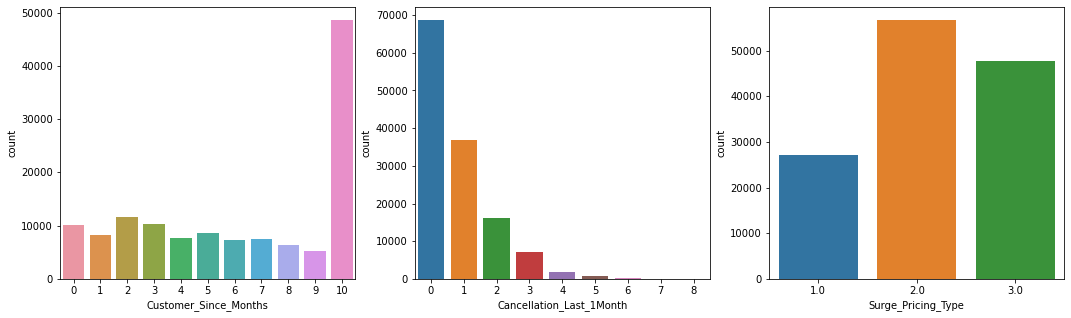

In [32]:
dis_cols = ['Customer_Since_Months', 'Cancellation_Last_1Month', 'Surge_Pricing_Type']
fig,axes=plt.subplots(1,3,figsize=(18,5))
sns.countplot(df_train["Customer_Since_Months"],ax=axes[0])
sns.countplot(df_train["Cancellation_Last_1Month"],ax=axes[1])
sns.countplot(df_train["Surge_Pricing_Type"],ax=axes[2])
plt.show()

##### Inference
1. Customer_Since_Months
    - Customer using cab services since 10 months are more than other months.
2. Cancellation_Last_1Month
    - The customers didn't cancelled their trips as there are less cancellation since last 1 month.
3. Surge_Pricing_Type
    - Pricing Type "2" has most count followed by "3" and "1".

##### Numerical Features

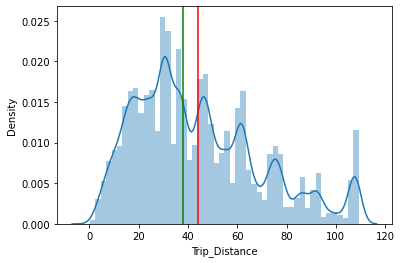

In [34]:
sns.distplot(df_train["Trip_Distance"])
plt.axvline(df_train["Trip_Distance"].mean(),color="r")
plt.axvline(df_train["Trip_Distance"].median(),color="g")
plt.show()

##### Inference
- Most of the passengers has travelled a distance between 25 to 35.
- The Average distance travelled by the passenger is 45.

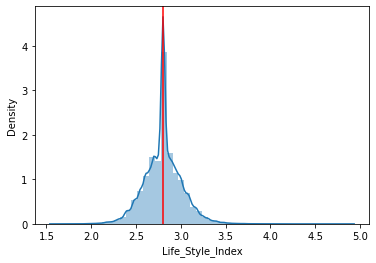

In [35]:
sns.distplot(df_train["Life_Style_Index"])
plt.axvline(df_train["Life_Style_Index"].mean(),color="r")
plt.show()

##### Inference
- The mean of lifestyle of the customer based on their behaviour is around 2.8

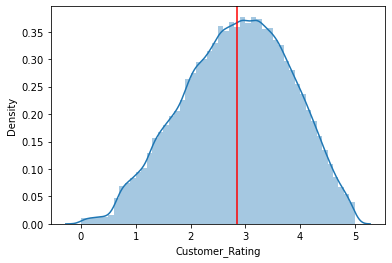

In [36]:
sns.distplot(df_train["Customer_Rating"])
plt.axvline(df_train["Customer_Rating"].mean(),color="r")
plt.show()

##### Inference
- Most of the customers gave rating between 2.5 and 3.5
- Average of life time ratings of the customer till date is around 2.8
- The distribution is somewhat left skewed.

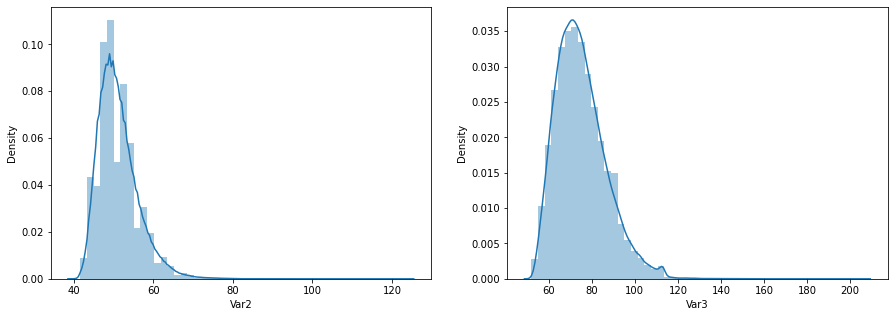

In [39]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df_train["Var2"],ax=axes[0])
sns.distplot(df_train["Var3"],ax=axes[1])
plt.show()

##### Inference
Var2 and Var3 distributions are Rightly skewed.
1. Var2
   - Most of the data lies in between around 45 to 55.
2. Var3
   - Most of the data lies in between around 60 to 80.

### Bivariate Analysis

##### Categorical Features

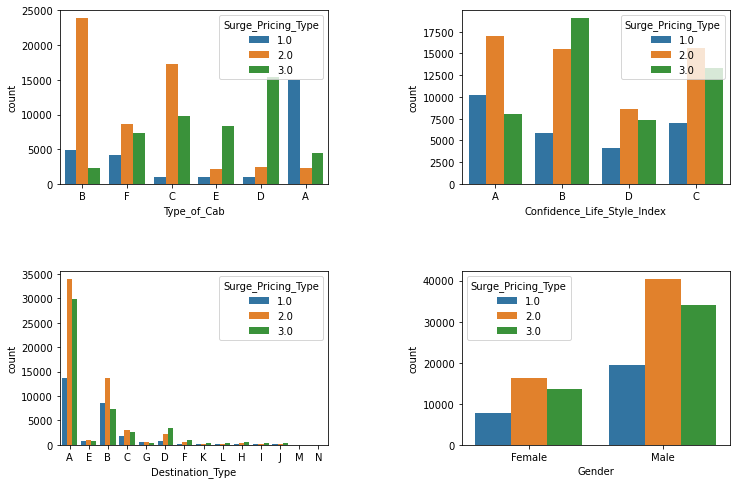

In [40]:
cat_cols = ['Type_of_Cab', 'Confidence_Life_Style_Index','Destination_Type', 'Gender']
fig,axes = plt.subplots(2,2,figsize=(12,8))
for idx,cat_col in enumerate(cat_cols):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df_train,hue=df_train["Surge_Pricing_Type"],ax=axes[row,col])
plt.subplots_adjust(wspace=0.5,hspace=0.5)

##### Inference
1. Type of Cab
   - If we took Cab type "B" then almost pricing type will be "2" followed by "1" and "3".
   - If we took Cab type "C" then almost pricing type will be "2" followed by "3" and very less is "1"
   - If we took Cab type "F" then almost pricing type will be "2" followed by "3" and "1"
   - If we took Cab type "E" then almost pricing type will be "3" and very less is "2" and "1"
   - If we took Cab type "D" then almost pricing type will be "3" and very less is "2" and "1"
   - If we took Cab type "D" then almost pricing type will be "1" and less is "3" and very less is "2"
2. Confidence life style index
   - If the Confidence_Life_Style_Index "A" then almost pricing type will be "2" followed by "1" and "3".
   - If the Confidence_Life_Style_Index "B" then almost pricing type will be "3" followed by "2" and "1".
   - If the Confidence_Life_Style_Index "D" then almost pricing type will be "2" followed by "3" and "1".
   - If the Confidence_Life_Style_Index "C" then almost pricing type will be "2" followed by "3" and "1".
3. Destination_Type
   - The Destination_type "A" and "B" are mostly used by the customers.
   - In "A" type the pricing type is almost "2" followed by "3" and "1".
   - In "B" type the pricing type is almost "2" followed by "1" and "3".
   - In "D" type the pricing type is almost "3" followed by "2" and "1".
   - In "C" type the pricing type is almost "2" followed by "1" and "3".
   - In "E" type the pricing type is almost equal.
4. Gender
   - The Male customers are more than Female.
   - If the customer is Male then the pricing type is "2" followed by "3" and "1".
   - If the customer is Female then the pricing type is "2" followed by "3" and "1".

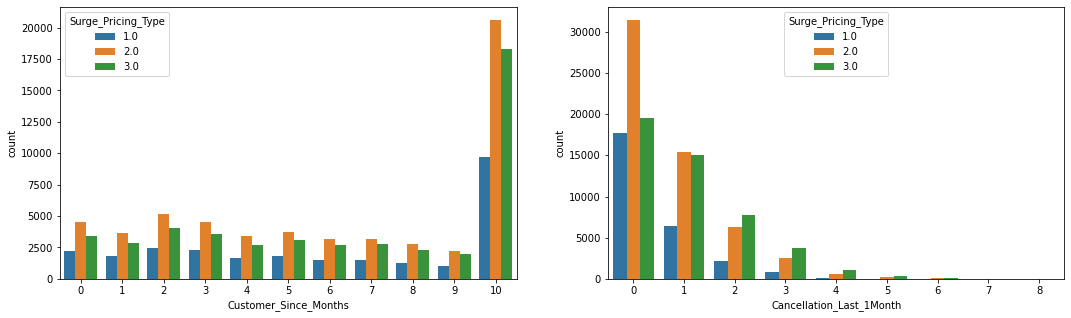

In [41]:
fig,axes=plt.subplots(1,2,figsize=(18,5))
sns.countplot(df_train["Customer_Since_Months"],hue=df_train["Surge_Pricing_Type"],ax=axes[0])
sns.countplot(df_train["Cancellation_Last_1Month"],hue=df_train["Surge_Pricing_Type"],ax=axes[1])
plt.show()

##### Inference
1. Customer_Since_Months
   - The customers are using the cabs from the last 10 months are more.
   - Most of the times the pricing type is "2" followed by "3" and "1".
2. Cancellation_Last_1Month
   - Most of the times the pricing type is "2" followed by the "3" and "1".
   - If the cancellation trips are more than "1" the pricing type will be "3" followed by "2" and "1".

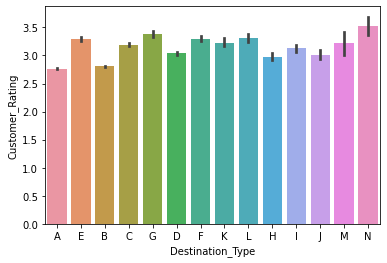

In [42]:
sns.barplot(df_train["Destination_Type"],df_train["Customer_Rating"])
plt.show()

##### Inference
- The customer rating is high for Destination_Type "N" compared to other destination type, followed by "G" and other destination types.

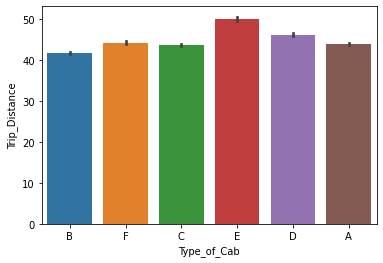

In [43]:
sns.barplot(df_train["Type_of_Cab"],df_train["Trip_Distance"])
plt.show()

##### Inference
- Customers travelled more on "E" cab type which is almost 50.

##### Numerical Features 

In [44]:
num_cols = df_train.select_dtypes(include="number")
num_cols.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

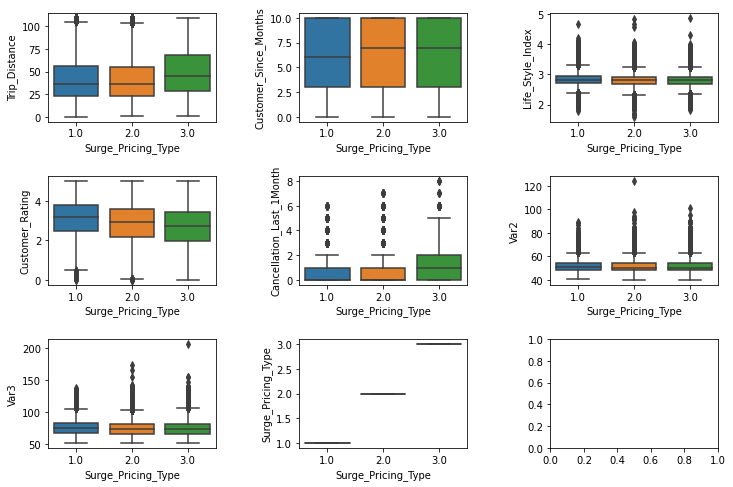

In [45]:
fig,axes = plt.subplots(3,3,figsize=(12,8))
for idx,num_col in enumerate(num_cols):
    row,col = idx//3,idx%3
    sns.boxplot(y=num_col,data=df_train,x=df_train["Surge_Pricing_Type"],ax=axes[row,col])
plt.subplots_adjust(wspace=0.5,hspace=0.5)

##### Inference
1. Trip_Distance
   - If the Trip_Distance median is around 35 then the pricing type will be "2" or "1"
   - If the Trip_Distance median is around 45 then the pricing type will be "3"
2. Life_Style_Index
   - If the Life_Style_Index median is around 2.8 then the pricing type will be "1" or "2" or "3"
3. Customer_Rating
   - If the Customer_Rating is above "3" then the princing type will be "1"
   - If the Customer_Rating is close to "3" then the princing type will be "2" or "1".

### Descriptive Statistics

In [46]:
df_train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.195766,2.802064,2.849458,0.782838,51.202800,75.099019,2.155747
std,25.522882,3.639259,0.207760,0.980675,1.037559,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.687952,2.152500,0.000000,48.000000,67.000000,2.000000
50%,38.200000,7.000000,2.802064,2.895000,0.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.912815,3.582500,1.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,124.000000,206.000000,3.000000


In [47]:
df_train.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.094443,0.468367,-0.054654,-0.007686,0.200456,0.231706,0.135928
Customer_Since_Months,0.094443,1.000000,0.081447,-0.055156,-0.007679,0.029413,0.103044,0.028340
Life_Style_Index,0.468367,0.081447,1.000000,0.189173,0.068176,0.215921,0.303296,-0.073682
Customer_Rating,-0.054654,-0.055156,0.189173,1.000000,0.003595,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.007679,0.068176,0.003595,1.000000,0.095830,0.128686,0.185646
Var2,0.200456,0.029413,0.215921,-0.302968,0.095830,1.000000,0.683437,0.003437
Var3,0.231706,0.103044,0.303296,-0.227531,0.128686,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.028340,-0.073682,-0.155279,0.185646,0.003437,-0.039309,1.000000


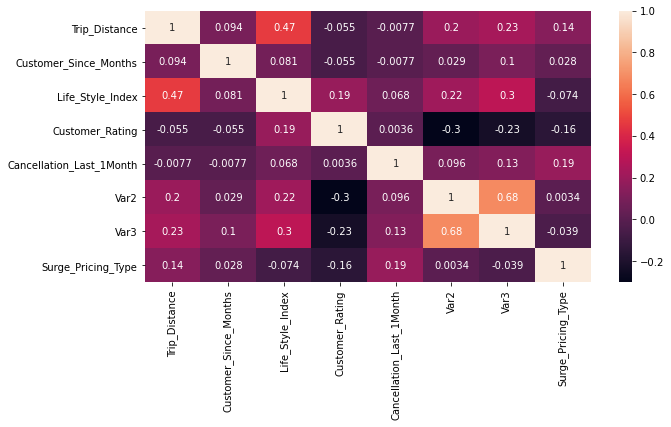

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

##### Inference
- From the graph we can say that there is no strong correlation between any of the variable to target.

### Treating the Outliers

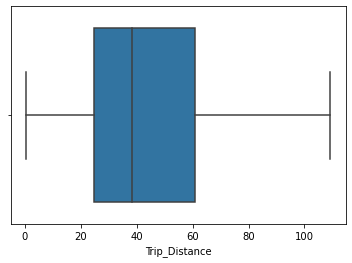

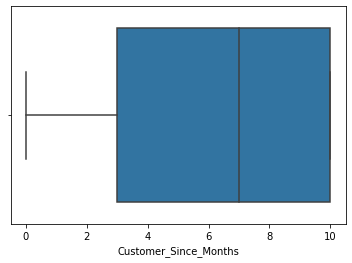

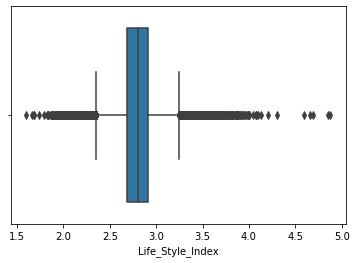

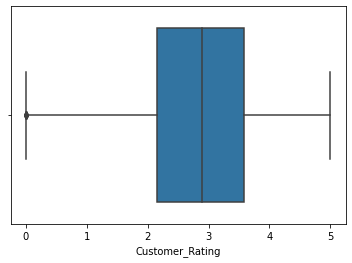

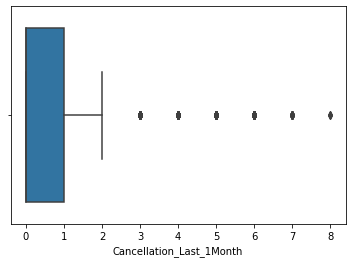

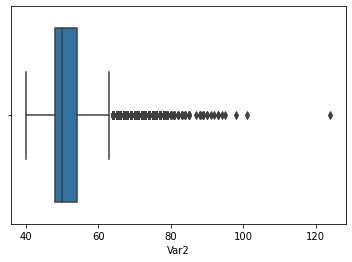

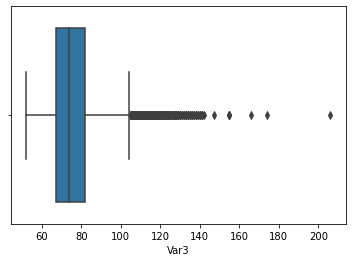

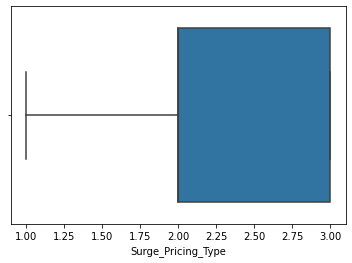

In [49]:
for col in numerical_features:
    sns.boxplot(df_train[col])
    plt.show()

##### Inference
- As we saw there are some outliers present in our dataset.

### Transformation

In [13]:
### Before Transformation
import scipy.stats as stats
cols = ['Cancellation_Last_1Month','Customer_Since_Months','Trip_Distance','Life_Style_Index',
        'Customer_Rating', 'Var2', 'Var3']
for i in cols:
    print(i)
    print("The Skewness of",i,"is",df_all[i].skew())
    print("The P-value of",i,"is",stats.shapiro(df_all[i])[1])
    print()

Cancellation_Last_1Month
The Skewness of Cancellation_Last_1Month is 1.5442596931085575
The P-value of Cancellation_Last_1Month is 0.0

Customer_Since_Months
The Skewness of Customer_Since_Months is -0.3173114142069423
The P-value of Customer_Since_Months is 0.0

Trip_Distance
The Skewness of Trip_Distance is 0.7260082783456537
The P-value of Trip_Distance is 0.0

Life_Style_Index
The Skewness of Life_Style_Index is 0.22502850608191527
The P-value of Life_Style_Index is 0.0

Customer_Rating
The Skewness of Customer_Rating is -0.19266505605334006
The P-value of Customer_Rating is 0.0

Var2
The Skewness of Var2 is 1.1679649458886794
The P-value of Var2 is 0.0

Var3
The Skewness of Var3 is 0.8190389815207447
The P-value of Var3 is 0.0



In [13]:
### Transformation
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
cols = ['Cancellation_Last_1Month','Customer_Since_Months','Trip_Distance','Life_Style_Index',
        'Customer_Rating', 'Var2', 'Var3']
for i in cols:
    df_all[i]=pt.fit_transform(df_all[[i]])

In [15]:
## After Transformation
import scipy.stats as stats
cols = ['Cancellation_Last_1Month','Customer_Since_Months','Trip_Distance','Life_Style_Index',
        'Customer_Rating', 'Var2', 'Var3']
for i in cols:
    print(i)
    print("The Skewness of",i,"is",df_all[i].skew())
    print("The P-value of",i,"is",stats.shapiro(df_all[i])[1])
    print()

Cancellation_Last_1Month
The Skewness of Cancellation_Last_1Month is 0.2792420184089618
The P-value of Cancellation_Last_1Month is 0.0

Customer_Since_Months
The Skewness of Customer_Since_Months is -0.353667745742443
The P-value of Customer_Since_Months is 0.0

Trip_Distance
The Skewness of Trip_Distance is -0.04037405986680118
The P-value of Trip_Distance is 0.0

Life_Style_Index
The Skewness of Life_Style_Index is 0.008721400833871068
The P-value of Life_Style_Index is 0.0

Customer_Rating
The Skewness of Customer_Rating is -0.07450227371179766
The P-value of Customer_Rating is 0.0

Var2
The Skewness of Var2 is 0.02276155703046413
The P-value of Var2 is 0.0

Var3
The Skewness of Var3 is 0.018781132084892058
The P-value of Var3 is 0.0



In [16]:
df_all.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type,data
0,T0005689460,-2.050146,B,-1.436342,-1.848467,A,A,1.088112,-0.928235,-1.195084,-1.532008,Female,2.0,train
1,T0005689461,-0.447807,B,1.037875,-0.077120,B,A,0.601133,-0.928235,1.059582,0.401783,Male,2.0,train
2,T0005689464,0.083351,F,1.037875,0.017305,D,E,0.655500,1.284153,1.059582,0.317685,Male,2.0,train
3,T0005689465,0.780487,C,1.037875,0.017305,D,A,0.605107,-0.928235,0.345241,0.051987,Male,3.0,train
4,T0005689467,0.567899,C,1.037875,1.110910,B,A,0.550857,1.736303,-0.338789,1.931748,Male,2.0,train


### Feature Selection (Stats Method)

In [26]:
from scipy.stats import chi2_contingency
cat_cols = df_all.select_dtypes(exclude="number")
col_name = []
pvalue = []
significance = []
for col in cat_cols.columns:
    col_name.append(col)
    cs = chi2_contingency(pd.crosstab(df_all[col],df_all["Surge_Pricing_Type"]))[1]
    pvalue.append(round(cs, 4))
    if (cs<0.05):
        significance.append("Significant")
    else:
        significance.append("Insignificant")
        
pd.DataFrame({"Feature":col_name,"P-value":pvalue,"Significance":significance})

,Feature,P-value,Significance
0,Trip_ID,0.0,Significant
1,Type_of_Cab,0.0,Significant
2,Confidence_Life_Style_Index,0.0,Significant
3,Destination_Type,0.0,Significant
4,Gender,0.0,Significant
5,data,0.0,Significant


In [27]:
num_cols = df_all.select_dtypes(include="number")
col_name = []
pvalue = []
significance = []
for col in num_cols.columns[:-1]:
    col_name.append(col)
    g1 = df_all[col][df_all["Surge_Pricing_Type"]==1]
    g2 = df_all[col][df_all["Surge_Pricing_Type"]==2]
    g3 = df_all[col][df_all["Surge_Pricing_Type"]==3]
    f_st1,f_p1 = stats.levene(g1,g2,g3)
    if f_p1<0.05:
        f_st_k,f_p_k = stats.kruskal(g1,g2,g3)
        pvalue.append(round(f_p_k,4))
        if f_p_k<0.05:
            significance.append("significant")
        else:
            significance.append("Insignificant")
    if f_p1>0.05:
        f_st_f,f_p_f = stats.f_oneway(g1,g2,g3)
        pvalue.append(round(f_p_f,4))
        if f_p_f<0.05:
            significance.append("significant")
        else:
            significance.append("Insignificant")
pd.DataFrame({'Feature':col_name,'P_value':pvalue,'Significance':significance})

,Feature,P_value,Significance
0,Trip_Distance,0.0,significant
1,Customer_Since_Months,0.0,significant
2,Life_Style_Index,0.0,significant
3,Customer_Rating,0.0,significant
4,Cancellation_Last_1Month,0.0,significant
5,Var2,0.0,significant
6,Var3,0.0,significant


In [28]:
cat_cols=df_all.select_dtypes('object')
cat_cols.columns[1:-1]

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

In [29]:
for col in cat_cols.columns[1:-1]:
    print(col)
    print(df_all[col].value_counts())
    print()

Type_of_Cab
B    51585
C    46732
A    35878
F    33368
D    31885
E    19609
Name: Type_of_Cab, dtype: int64

Confidence_Life_Style_Index
B    67265
C    59736
A    58536
D    33520
Name: Confidence_Life_Style_Index, dtype: int64

Destination_Type
A    129010
B     49193
C     12397
D     11085
E      4549
F      3222
G      2513
H      2124
I      1334
J      1166
K      1102
L      1052
M       160
N       150
Name: Destination_Type, dtype: int64

Gender
Male      156128
Female     62929
Name: Gender, dtype: int64



In [30]:
# you can use following method if you want to ignore categories with too low frequencies ,
#in next section for logistic regression we will be using  pandas' get dummies function. 
# you can work with either of these . 
#ignoring categories with low frequencies however will result in fewer columns without 
# affecting model performance too much 

for col in cat_cols.columns[1:-1]:
    freqs=df_all[col].value_counts()
    k=freqs.index[freqs>1000][:-1]
    for cat in k:
        name=col+'_'+cat
        df_all[name]=(df_all[col]==cat).astype(int)
    del df_all[col]
    print(col)

Type_of_Cab
Confidence_Life_Style_Index
Destination_Type
Gender


In [31]:
df_all.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type,data,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_A,Type_of_Cab_F,Type_of_Cab_D,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_A,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Gender_Male
0,T0005689460,-2.050146,-1.436342,-1.848467,1.088112,-0.928235,-1.195084,-1.532008,2.0,train,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,T0005689461,-0.447807,1.037875,-0.077120,0.601133,-0.928235,1.059582,0.401783,2.0,train,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,T0005689464,0.083351,1.037875,0.017305,0.655500,1.284153,1.059582,0.317685,2.0,train,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,T0005689465,0.780487,1.037875,0.017305,0.605107,-0.928235,0.345241,0.051987,3.0,train,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,T0005689467,0.567899,1.037875,1.110910,0.550857,1.736303,-0.338789,1.931748,2.0,train,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [32]:
df_all.shape

(219057, 30)

In [27]:
df_train = df_all[df_all["data"]=="train"]
del df_train["data"]
df_test = df_all[df_all["data"]=="test"]
df_test.drop(["Surge_Pricing_Type","data"],axis=1,inplace=True)

In [34]:
df_train.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_A,Type_of_Cab_F,Type_of_Cab_D,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_A,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Gender_Male
0,T0005689460,-2.050146,-1.436342,-1.848467,1.088112,-0.928235,-1.195084,-1.532008,2.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,T0005689461,-0.447807,1.037875,-0.077120,0.601133,-0.928235,1.059582,0.401783,2.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,T0005689464,0.083351,1.037875,0.017305,0.655500,1.284153,1.059582,0.317685,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,T0005689465,0.780487,1.037875,0.017305,0.605107,-0.928235,0.345241,0.051987,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,T0005689467,0.567899,1.037875,1.110910,0.550857,1.736303,-0.338789,1.931748,2.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [35]:
df_train.shape

(131662, 29)

In [36]:
df_train.isnull().sum()

Trip_ID                          0
Trip_Distance                    0
Customer_Since_Months            0
Life_Style_Index                 0
Customer_Rating                  0
Cancellation_Last_1Month         0
Var2                             0
Var3                             0
Surge_Pricing_Type               0
Type_of_Cab_B                    0
Type_of_Cab_C                    0
Type_of_Cab_A                    0
Type_of_Cab_F                    0
Type_of_Cab_D                    0
Confidence_Life_Style_Index_B    0
Confidence_Life_Style_Index_C    0
Confidence_Life_Style_Index_A    0
Destination_Type_A               0
Destination_Type_B               0
Destination_Type_C               0
Destination_Type_D               0
Destination_Type_E               0
Destination_Type_F               0
Destination_Type_G               0
Destination_Type_H               0
Destination_Type_I               0
Destination_Type_J               0
Destination_Type_K               0
Gender_Male         

In [37]:
df_test.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_A,Type_of_Cab_F,Type_of_Cab_D,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_A,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Gender_Male
0,T0005689459,-1.768505,1.037875,-1.100919,0.846098,1.284153,-1.195084,-1.134465,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,T0005689462,-0.320094,1.037875,0.253438,-1.271090,-0.928235,-0.338789,0.563772,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,T0005689463,-1.680368,-0.578396,-0.451948,1.744324,-0.928235,-0.887310,0.051987,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,T0005689466,-1.307791,-0.029264,-1.571190,1.771993,-0.928235,-2.282568,-2.456677,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,T0005689468,-0.325670,0.240869,0.084090,1.850991,1.566074,-1.889798,-2.126905,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [38]:
df_test.isnull().sum()

Trip_ID                          0
Trip_Distance                    0
Customer_Since_Months            0
Life_Style_Index                 0
Customer_Rating                  0
Cancellation_Last_1Month         0
Var2                             0
Var3                             0
Type_of_Cab_B                    0
Type_of_Cab_C                    0
Type_of_Cab_A                    0
Type_of_Cab_F                    0
Type_of_Cab_D                    0
Confidence_Life_Style_Index_B    0
Confidence_Life_Style_Index_C    0
Confidence_Life_Style_Index_A    0
Destination_Type_A               0
Destination_Type_B               0
Destination_Type_C               0
Destination_Type_D               0
Destination_Type_E               0
Destination_Type_F               0
Destination_Type_G               0
Destination_Type_H               0
Destination_Type_I               0
Destination_Type_J               0
Destination_Type_K               0
Gender_Male                      0
dtype: int64

In [39]:
df_test.shape

(87395, 28)

### Model Building

In [41]:
x = df_train.drop(["Surge_Pricing_Type","Trip_ID"],axis=1)
y = df_train["Surge_Pricing_Type"]

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [36]:
### Set seed for same results everytime
seed=0

lr = LogisticRegression()
rf=RandomForestClassifier()
weak_learner=DecisionTreeClassifier(max_depth=1,random_state=7)
adb = AdaBoostClassifier(base_estimator=weak_learner, n_estimators=10,random_state=7)
lgbmc = lgb.LGBMClassifier()
bgc=BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=7)
xgb=XGBClassifier(learning_rate=0.09,n_estimators=125,max_depth=4,min_child_weight=4,
                  colsample_bytree=0.5,reg_alpha=0.000001)

models=[lr,rf,adb,lgbmc,bgc,gnb,knn,dt,bgcl_lr,xgb]
tr_acc_score,te_acc_score,sctr,scte,roc_acu_score,f1score,bias_error,variance_error,results=[],[],[],[],[],[],[],[],[]

def ens(x_train, x_test, y_train, y_test):
    for model in models:
            model.fit(x_train, y_train)
            kf = KFold(n_splits=5,shuffle=True,random_state=7)
            scorer = make_scorer(f1_score, average='weighted')
            score_best = cross_val_score(model, x, y, cv=kf, scoring=scorer)
            results.append(score_best)
            y_train_pred = model.predict(x_train)
            train_score = model.score(x_train,y_train)
            train_acc_score = accuracy_score(y_train,y_train_pred)
            y_test_pred = model.predict(x_test)
            test_score = model.score(x_test,y_test)
            test_acc_score = accuracy_score(y_test,y_test_pred)
            
            f1_sc=np.mean(score_best)
            bi_err = np.mean(1-score_best)
            var_err=np.std(score_best)
            
            tr_acc_score.append(train_acc_score)
            te_acc_score.append(test_acc_score)
            sctr.append(train_score)
            scte.append(test_score)
            f1score.append(f1_sc)
            bias_error.append(bi_err)
            variance_error.append(var_err)
            results.append(score_best)
    return tr_acc_score,te_acc_score,sctr,scte,f1score,variance_error
ens(x_train,x_test, y_train, y_test)

ensemble=pd.DataFrame({'Names':['Logistic Regression','Random Forest','Ada boost','Lgbm','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR','XGBoost'],
                       'Train_Accuracy_Score':tr_acc_score,
                       'Test_Accuracy_Score':te_acc_score,
                       'Training':sctr,
                       'Testing':scte,
                       'F1_score':f1score, 
                       "Bias_error":bias_error,
                       'Variance_error':variance_error})

[13:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:06:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [37]:
ensemble = ensemble.sort_values(by='F1_score', ascending=False).reset_index(drop=True)
ensemble

,Names,Train_Accuracy_Score,Test_Accuracy_Score,Training,Testing,F1_score,Bias_error,Variance_error
0,Lgbm,0.714734,0.700777,0.714734,0.700777,0.697529,0.302471,0.001952
1,XGBoost,0.702494,0.698068,0.702494,0.698068,0.694737,0.305263,0.001069
2,Logistic Regression,0.691883,0.692726,0.691883,0.692726,0.689239,0.310761,0.002847
3,bagged LR,0.691818,0.692220,0.691818,0.692220,0.689155,0.310845,0.002933
4,Random Forest,0.999989,0.690347,0.999989,0.690347,0.687688,0.312312,0.002841
5,Ada boost,0.663433,0.664169,0.663433,0.664169,0.671345,0.328655,0.004466
6,Bagging,0.983377,0.659662,0.983377,0.659662,0.658133,0.341867,0.002114
7,KNN,0.742793,0.637662,0.742793,0.637662,0.639695,0.360305,0.002556
8,Naive-Bayes,0.624578,0.627332,0.624578,0.627332,0.611985,0.388015,0.002688
9,Decistion Tree,1.000000,0.572470,1.000000,0.572470,0.575185,0.424815,0.001379


### Light GBM

In [44]:
import lightgbm as lgb
lgbmc = lgb.LGBMClassifier(random_state=4)
lgbmc.fit(x_train,y_train)

y_train_pred = lgbmc.predict(x_train)
y_train_prob = lgbmc.predict_proba(x_train)

print('TRAIN Data--------')
print('CM: \n',confusion_matrix(y_train,y_train_pred))
print('Accuracy: ',accuracy_score(y_train,y_train_pred))
print('ROC: ',roc_auc_score(y_train,y_train_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_train,y_train_pred))
print()

y_test_pred = lgbmc.predict(x_test)
y_test_prob = lgbmc.predict_proba(x_test)

print('TEST Data---------')
print('CM: \n',confusion_matrix(y_test,y_test_pred))
print('Accuracy: ',accuracy_score(y_test,y_test_pred))
print('ROC: ',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))
print('Classification Report: \n',classification_report(y_test,y_test_pred))

TRAIN Data--------
CM: 
 [[10680  6172  2227]
 [ 1748 32340  5637]
 [ 1557  8978 22824]]
Accuracy:  0.7144298688193743
ROC:  0.8661422499568725
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.76      0.56      0.65     19079
         2.0       0.68      0.81      0.74     39725
         3.0       0.74      0.68      0.71     33359

    accuracy                           0.71     92163
   macro avg       0.73      0.69      0.70     92163
weighted avg       0.72      0.71      0.71     92163


TEST Data---------
CM: 
 [[ 4523  2610  1002]
 [  804 13610  2589]
 [  710  4093  9558]]
Accuracy:  0.7010557229296944
ROC:  0.8495924599669386
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.75      0.56      0.64      8135
         2.0       0.67      0.80      0.73     17003
         3.0       0.73      0.67      0.69     14361

    accuracy                           0.70     39499
   macro

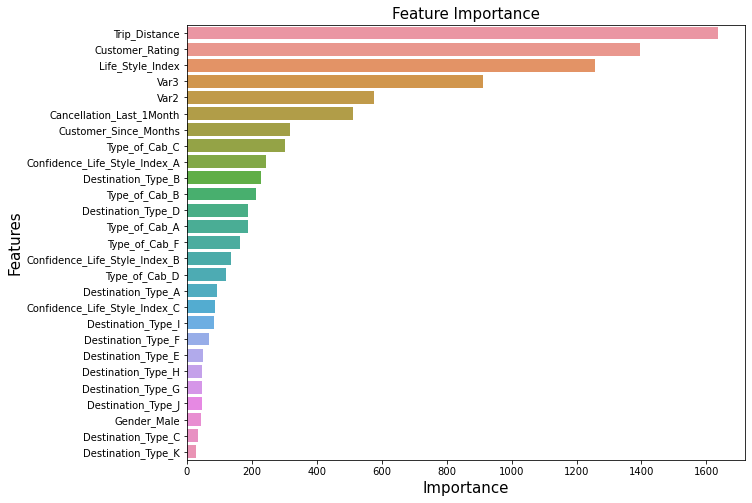

In [70]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': lgbmc.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(10,8))
# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [74]:
df_test.head()

,Trip_ID,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_A,Type_of_Cab_F,Type_of_Cab_D,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Confidence_Life_Style_Index_A,Destination_Type_A,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Gender_Male
0,T0005689459,-1.768505,1.037875,-1.100919,0.846098,1.284153,-1.195084,-1.134465,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,T0005689462,-0.320094,1.037875,0.253438,-1.271090,-0.928235,-0.338789,0.563772,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,T0005689463,-1.680368,-0.578396,-0.451948,1.744324,-0.928235,-0.887310,0.051987,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,T0005689466,-1.307791,-0.029264,-1.571190,1.771993,-0.928235,-2.282568,-2.456677,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,T0005689468,-0.325670,0.240869,0.084090,1.850991,1.566074,-1.889798,-2.126905,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1


In [75]:
test_probs = lgbmc.predict(df_test.drop("Trip_ID",axis=1))
test_probs

array([1., 2., 2., ..., 1., 2., 2.])

In [76]:
result = pd.DataFrame({"Trip_ID": df_test['Trip_ID'], 'Default': test_probs})
result.head()

,Trip_ID,Default
0,T0005689459,1.0
1,T0005689462,2.0
2,T0005689463,2.0
3,T0005689466,2.0
4,T0005689468,2.0


In [77]:
result["Default"].value_counts()

2.0    44616
3.0    29431
1.0    13348
Name: Default, dtype: int64

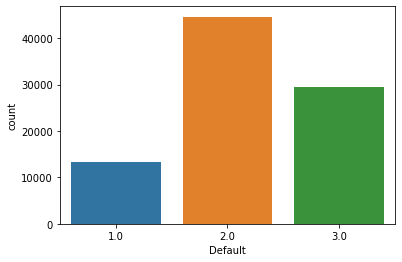

In [79]:
sns.countplot(result["Default"])
plt.show()

In [78]:
#Saving the data to an csv file
result.to_csv(r'C:\Users\sujit\SUJITH\Capstone.csv', index=False)